In [1]:
import argparse
import pandas

# declare some column names
travelTime = 'travelTime'
startTime = 'startTime'
endTime = 'endTime'
id = 'personId'
tripNumber = 'tripNo'
mode = 'mainMode'
distance = 'distance'

def parse_args(args):
    parser = argparse.ArgumentParser()
    parser.add_argument('-f', '--files', nargs='+', required=True)
    parser.add_argument('-n', '--names', nargs='+', required=True)
    return parser.parse_args(args)

def read_csv(listOfFiles, listOfNames):
    
    assert(len(listOfFiles) == len(listOfNames)), 'number of files and scenario names should be equal but was: (' + str(len(listOfFiles)) + '/' + str(len(listOfNames)) + ')'
    
    result = []

    for file, name in zip(listOfFiles, listOfNames):
        scenario = pandas.read_csv(file, usecols=[id, tripNumber, distance, startTime, endTime, mode])
        scenario.set_index([id, tripNumber], inplace=True)
        scenario.sort_index(inplace=True)
        result.append(scenario)
    return result

In [2]:
dataPath = "C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\"
args = parse_args([
    '-f', dataPath + 'base-case.csv', dataPath + 'healthy.csv', dataPath + 'deurb-no-drt.csv', dataPath + 'deurb-low-fare.csv', dataPath + 'smart.csv',
    '-n', 'Basisfall', 'Gesund & Nachhaltig', 'Deurb !Drt', 'Deurb', 'Smart'
])

dataFrames = read_csv(args.files, args.names)
data = pandas.concat(dataFrames, keys=args.names, names=['RunId', id, tripNumber])
data.head(10)

startTime  endTime      distance mainMode
RunId     personId tripNo                                           
Basisfall 54804601 0         24903.0  27398.0  13001.306360      car
                   1         32565.0  34230.0   4781.294600      car
                   2         34230.0  35390.0   2302.954800      car
                   3         41131.0  42675.0   4047.200370      car
                   4         42675.0  43419.0   1608.864389      car
                   5         43419.0  46989.0  14864.202568      car
          54822301 0         22837.0  25171.0  19651.739046      car
                   1         49188.0  51108.0   9440.114341      car
                   2         55531.0  57886.0  12267.871932      car
          54847601 0         21487.0  24319.0  30129.437690      car

In [3]:
data['time'] = data['endTime'] - data['startTime']

walk_trips = data[(data.mainMode == 'walk')]
walk_trips.sort_values(by=['time'], inplace=True, ascending=False)
walk_trips.head(50)

c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


startTime   endTime      distance  \
RunId               personId   tripNo                                      
Deurb !Drt          1016010401 1         57617.0  127596.0   2008.899902   
Deurb               687437201  5         58765.0  125706.0  84193.676937   
Deurb !Drt          1013255901 3         63807.0  128441.0   1750.800608   
                    1019433701 1         64639.0  125950.0   6088.277201   
                    1263678601 2         67514.0  128298.0   8755.791906   
                    1286436001 2         63584.0  124231.0   3427.326607   
Deurb               701348601  1         48080.0  107708.0  73523.426147   
Deurb !Drt          701348601  1         66006.0  125634.0  73523.426147   
                    1271319501 3         62087.0  121038.0  10739.793914   
                    1019633801 2         67774.0  126095.0   1181.145072   
                    1410444101 2         71125.0  128555.0   5238.191894   
Deurb               601640901  1         48909.0  105954.0  71929.172763   
Deurb !Drt          1176130201 3         62580.0  118657.0  16708.848164   
Deurb               1176130201 3         69815.0  125892.0  16708.848164   
Deurb !Drt          389728301  1         61969.0  117878.0    897.481596   
                    1252473401 3         69911.0  124181.0   7493.712336   
                    1267082701 1         71258.0  124724.0   3333.438783   
                    1218166501 4         74210.0  127489.0   3509.857186   
                    1019988001 6         76610.0  129573.0  33860.693677   
                    1241680101 5         70841.0  122435.0  11280.182127   
                    1409381601 2         68521.0  120055.0   5997.931918   
                    1254628001 3         73474.0  124988.0  10724.196181   
Deurb               1254628001 3         74756.0  126270.0  10724.196181   
                    1011220301 0         16904.0   67924.0    930.275089   
Deurb !Drt          1011220301 0         19603.0   70623.0    930.275089   
                    77285301   1         75480.0  126487.0   4521.707765   
                    1251029301 0         12032.0   62873.0   3144.444592   
Deurb               1251029301 0         20837.0   71678.0   3144.444592   
                    1018833201 2         69733.0  119994.0  31253.293401   
Deurb !Drt          1018833201 2         74616.0  124877.0  31253.293401   
Deurb               1251029301 3         72615.0  121911.0   1888.157054   
Deurb !Drt          1251029301 3         65653.0  114949.0   1888.157054   
                    1241681601 1         77694.0  126401.0   8022.451706   
Deurb               710605501  0         12183.0   60781.0  61461.275404   
Deurb !Drt          1214457901 0         19845.0   68232.0   8691.203164   
Gesund & Nachhaltig 583530101  0         22514.0   70872.0  61149.227292   
                               1         70872.0  119230.0  61149.227292   
Deurb !Drt          1214457901 4         71344.0  119633.0   9240.324723   
Deurb               1386501201 1         65399.0  113645.0  10455.889389   
Deurb !Drt          1386501201 1         66282.0  114528.0  10455.889389   
                    389074401  1         79844.0  128078.0  11837.199207   
                    1080388701 3         68791.0  116378.0  10762.621468   
                    1251691301 3         71876.0  119381.0   7979.734490   
Deurb               1251691301 3         79716.0  127221.0   7979.734490   
Deurb !Drt          73076401   1         59256.0  106530.0   6753.057877   
Deurb               1157792301 1         17388.0   64198.0  59249.948573   
                    1022704901 1         81224.0  127646.0   2945.277104   
                    576467401  1         51866.0   97970.0  58428.766840   
Deurb !Drt          708205301  3         62262.0  108305.0  23952.948473   
Deurb               1303921101 1         80571.0  126308.0  20399.740731   

                                      mainMode     time  
RunId               personId

c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


startTime  endTime       distance  \
RunId               personId   tripNo                                      
Deurb               1059428901 3         84540.0  84557.0   36645.749476   
Deurb !Drt          1059428901 3         86260.0  86277.0   36645.749476   
Deurb               1411073801 2         34733.0  34795.0  119410.999501   
Deurb !Drt          1411073801 2         32662.0  32724.0  119410.999501   
Deurb               875750901  3         49278.0  49291.0   18921.273758   
...                                          ...      ...            ...   
                    661447301  1         31260.0  31276.0       0.000000   
Gesund & Nachhaltig 1243901501 1         54660.0  54675.0       0.000000   
                    655209601  2         62807.0  62821.0       0.000000   
Smart               1269895501 0         42895.0  42899.0       0.000000   
Gesund & Nachhaltig 618845001  2         58560.0  58561.0       0.000000   

                                      mainMode  time        speed  
RunId               personId   tripNo                              
Deurb               1059428901 3          walk  17.0  2155.632322  
Deurb !Drt          1059428901 3          walk  17.0  2155.632322  
Deurb               1411073801 2          walk  62.0  1925.983863  
Deurb !Drt          1411073801 2          walk  62.0  1925.983863  
Deurb               875750901  3          walk  13.0  1455.482597  
...                                        ...   ...          ...  
                    661447301  1          walk  16.0     0.000000  
Gesund & Nachhaltig 1243901501 1          walk  15.0     0.000000  
                    655209601  2          walk  14.0     0.000000  
Smart               1269895501 0          walk   4.0     0.000000  
Gesund & Nachhaltig 618845001  2          walk   1.0     0.000000  

[177343 rows x 6 columns]

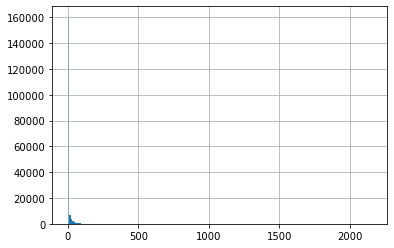

In [33]:
walk_trips['speed'] = walk_trips['distance'] / walk_trips['time']
walk_trips.sort_values(by=['speed'], inplace=True, ascending=False)
walk_trips['speed'].hist(bins=200)
walk_trips

,,,startTime,endTime,distance,mainMode,time,speed
RunId,personId,tripNo,,,,,,
Deurb,67528401,2,30199.0,30948.0,1497.867259,walk,749.0,1.999823
Deurb !Drt,67528401,2,30199.0,30948.0,1497.867259,walk,749.0,1.999823
Gesund & Nachhaltig,592186501,3,66660.0,67153.0,985.624992,walk,493.0,1.999239
Deurb,379183301,1,43879.0,44185.0,611.716872,walk,306.0,1.999075
Smart,379183301,1,43879.0,44185.0,611.716872,walk,306.0,1.999075
...,...,...,...,...,...,...,...,...
Deurb,1286476201,1,46980.0,48119.0,1139.097232,walk,1139.0,1.000085
Deurb !Drt,1286476201,1,46980.0,48119.0,1139.097232,walk,1139.0,1.000085
Basisfall,1286476201,1,46980.0,48119.0,1139.097232,walk,1139.0,1.000085


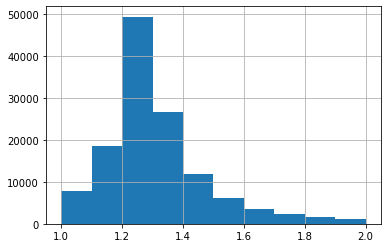

In [30]:
filtered = walk_trips.query('speed < 2 and speed > 1')
filtered['speed'].hist()
filtered

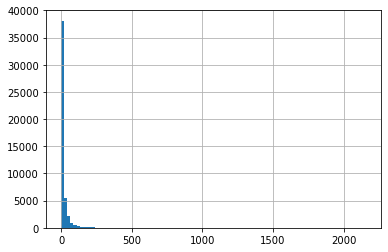

In [29]:
unplausible_walk_trips = walk_trips.query('speed > 2 or speed < 1')
unplausible_walk_trips
unplausible_walk_trips['speed'].hist(bins=100)

In [20]:
unstacked = unplausible_walk_trips.reset_index(level='personId')
unstacked

personId  startTime  endTime       distance  \
RunId               tripNo                                                  
Deurb               3       1059428901    84540.0  84557.0   36645.749476   
Deurb !Drt          3       1059428901    86260.0  86277.0   36645.749476   
Deurb               2       1411073801    34733.0  34795.0  119410.999501   
Deurb !Drt          2       1411073801    32662.0  32724.0  119410.999501   
Deurb               3        875750901    49278.0  49291.0   18921.273758   
...                                ...        ...      ...            ...   
Gesund & Nachhaltig 5        614430101    65996.0  66143.0       0.000000   
                    6        614430101    66143.0  66290.0       0.000000   
                    1       1253037201    50548.0  50696.0       0.000000   
                    1        934957201    50100.0  50246.0       0.000000   
                    2        618845001    58560.0  58561.0       0.000000   

                           mainMode   time        speed  
RunId               tripNo                               
Deurb               3          walk   17.0  2155.632322  
Deurb !Drt          3          walk   17.0  2155.632322  
Deurb               2          walk   62.0  1925.983863  
Deurb !Drt          2          walk   62.0  1925.983863  
Deurb               3          walk   13.0  1455.482597  
...                             ...    ...          ...  
Gesund & Nachhaltig 5          walk  147.0     0.000000  
                    6          walk  147.0     0.000000  
                    1          walk  148.0     0.000000  
                    1          walk  146.0     0.000000  
                    2          walk    1.0     0.000000  

[48390 rows x 7 columns]

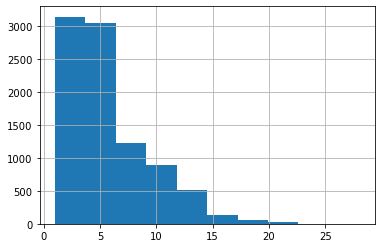

In [26]:
value_counts = unstacked['personId'].value_counts()
value_counts.hist()